# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [2]:
data = pd.read_csv('/content/superstore_retail_orders.csv')

print(data.info())
print(data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB
None
            order_id  order_date order_year_month    customer_name  \
count   56045.000000       56013            56013            56045   
unique           NaN         947               35            17343   
top              NaN  2022-03-01          2022-05 

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [4]:

data['quantity'] = data['quantity'].astype('float')

categorical_columns = ['order_date', 'order_year_month', 'customer_name', 'city',
                       'state_province', 'product_name', 'product_line']
for col in categorical_columns:
    data[col] = data[col].astype('category')


data.dtypes


order_id               int64
order_date          category
order_year_month    category
customer_name       category
city                category
state_province      category
quantity             float64
product_name        category
product_line        category
product_price        float64
dtype: object

In [5]:

Q1_quantity = data['quantity'].quantile(0.25)
Q3_quantity = data['quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

Q1_product_price = data['product_price'].quantile(0.25)
Q3_product_price = data['product_price'].quantile(0.75)
IQR_product_price = Q3_product_price - Q1_product_price

# Define bounds for outliers
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

lower_bound_product_price = Q1_product_price - 1.5 * IQR_product_price
upper_bound_product_price = Q3_product_price + 1.5 * IQR_product_price


data_iqr_filtered = data[(data['quantity'] >= lower_bound_quantity) & (data['quantity'] <= upper_bound_quantity) &
                         (data['product_price'] >= lower_bound_product_price) & (data['product_price'] <= upper_bound_product_price)]

original_size = data.shape[0]
filtered_size = data_iqr_filtered.shape[0]
original_size, filtered_size


(56045, 51977)

In [6]:
#impute values
data_iqr_filtered.dropna(inplace=True)
for column in data_iqr_filtered.columns:
    # Check if the column is numerical (int64 or float64)
    if data_iqr_filtered[column].dtype == 'float64' or data_iqr_filtered[column].dtype == 'int64':
        # Impute missing values with the median for numerical columns
        median_value = data_iqr_filtered[column].median()
        data_iqr_filtered[column].fillna(median_value, inplace=True)
    elif data_iqr_filtered[column].dtype == 'category':
        # Impute missing values with the mode for categorical columns
        mode_value = data_iqr_filtered[column].mode()[0]
        data_iqr_filtered[column].fillna(mode_value, inplace=True)


data_iqr_filtered['total_amount'] = data_iqr_filtered['quantity'] * data_iqr_filtered['product_price']

print(data_iqr_filtered.isnull().sum())  # This should show 0 missing values for all columns
print(data_iqr_filtered.head())

order_id            0
order_date          0
order_year_month    0
customer_name       0
city                0
state_province      0
quantity            0
product_name        0
product_line        0
product_price       0
total_amount        0
dtype: int64
   order_id  order_date order_year_month     customer_name               city  \
0     51188  2021-07-01          2021-07     Audrey Blanco  North Cherylmouth   
3     51241  2021-07-04          2021-07        Alexa Bell     Lake Tracytown   
4     51297  2021-07-08          2021-07        Casey Diaz        Byrdchester   
5     51319  2021-07-09          2021-07    Troy Rodriguez  South Brendamouth   
6     51357  2021-07-11          2021-07  Natalie Phillips        Rachelburgh   

              state_province  quantity  \
0  NEW HAMPSHIRE                   3.0   
3  WISCONSIN                       1.0   
4  MISSISSIPPI                     1.0   
5  OHIO                            1.0   
6  ALABAMA                         1.0   

     

<ipython-input-6-7a84602022a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iqr_filtered.dropna(inplace=True)
<ipython-input-6-7a84602022a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iqr_filtered[column].fillna(median_value, inplace=True)
<ipython-input-6-7a84602022a0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iqr_filtered[column].fillna(mode_value, inplace=True)
<ipython-input-6-7a84602022a0>:12: Sett

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [9]:

customer_fields = ['customer_name', 'city', 'state_province']  # Adjust this list based on the actual columns in your dataframe

# Check if all specified customer fields exist in the dataframe
if all(field in data_iqr_filtered.columns for field in customer_fields):

    data_iqr_filtered['complete_customer_info'] = data_iqr_filtered[customer_fields].notnull().all(axis=1).astype(int).astype(str).replace({"1": "1", "0": "2"})
else:
    print("One or more specified customer fields do not exist in the dataframe. Please adjust the customer_fields list accordingly.")

# Display the first few rows to verify the 'complete_customer_info' column
print(data_iqr_filtered[['customer_name', 'city', 'state_province', 'complete_customer_info']].head())


      customer_name               city             state_province  \
0     Audrey Blanco  North Cherylmouth  NEW HAMPSHIRE               
3        Alexa Bell     Lake Tracytown  WISCONSIN                   
4        Casey Diaz        Byrdchester  MISSISSIPPI                 
5    Troy Rodriguez  South Brendamouth  OHIO                        
6  Natalie Phillips        Rachelburgh  ALABAMA                     

  complete_customer_info  
0                      1  
3                      1  
4                      1  
5                      1  
6                      1  


<ipython-input-9-438d7309534a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iqr_filtered['complete_customer_info'] = data_iqr_filtered[customer_fields].notnull().all(axis=1).astype(int).astype(str).replace({"1": "1", "0": "2"})


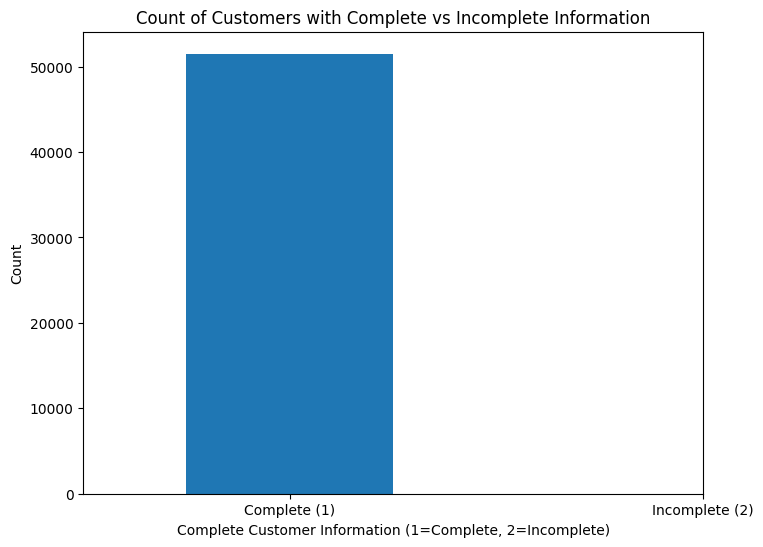

In [11]:
#create chart
complete_info_counts = data_iqr_filtered['complete_customer_info'].value_counts()

plt.figure(figsize=(8, 6))
complete_info_counts.plot(kind='bar')
plt.title('Count of Customers with Complete vs Incomplete Information')
plt.xlabel('Complete Customer Information (1=Complete, 2=Incomplete)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Complete (1)', 'Incomplete (2)'], rotation=0)  # Ensure the x-ticks match the intended labels
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Sprint, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

<ipython-input-16-5f3a3463f192>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iqr_filtered['order_date_temp'] = pd.to_datetime(data_iqr_filtered['order_date'], errors='coerce')


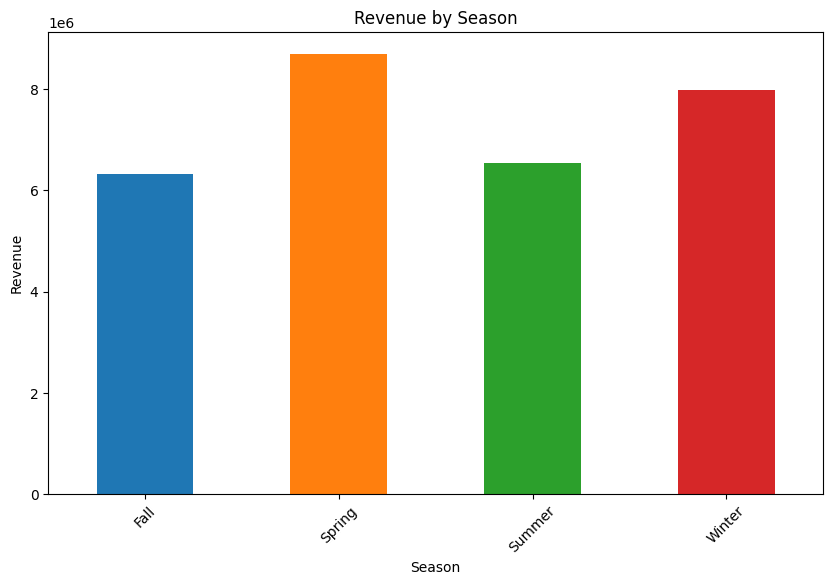

In [16]:

data_iqr_filtered['order_date_temp'] = pd.to_datetime(data_iqr_filtered['order_date'], errors='coerce')

# Exclude rows with invalid 'order_date' values
data_valid_dates = data_iqr_filtered[data_iqr_filtered['order_date_temp'].notna()].copy()

data_valid_dates['order_date'] = pd.to_datetime(data_valid_dates['order_date'], errors='raise')


def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'


data_valid_dates['Season'] = data_valid_dates['order_date'].apply(get_season)


revenue_by_season = data_valid_dates.groupby('Season')['total_amount'].sum()

# Plot revenue by season
revenue_by_season.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()



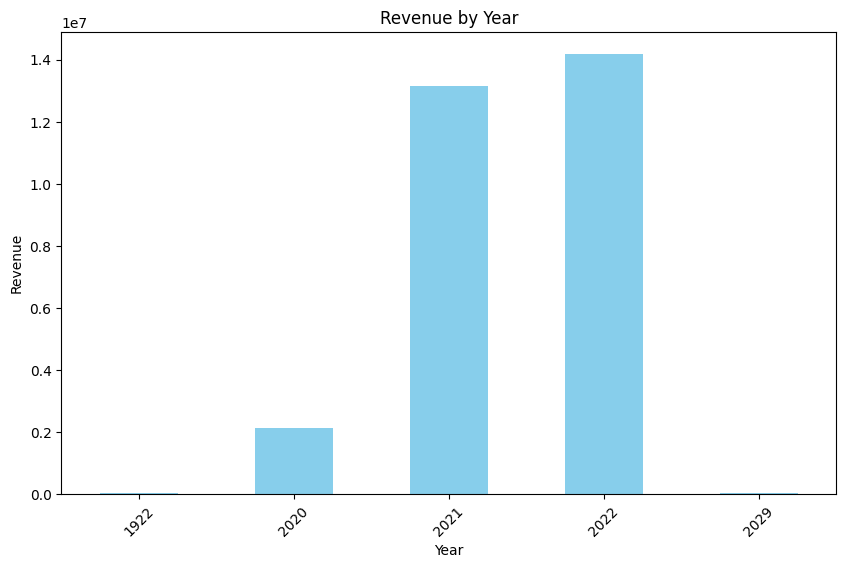

In [17]:
#revenue over time
# Extract year from 'order_date'
data_valid_dates['Year'] = data_valid_dates['order_date'].dt.year

# Calculate revenue by year
revenue_by_year = data_valid_dates.groupby('Year')['total_amount'].sum()

# Plot revenue by year
revenue_by_year.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

<ipython-input-18-70860ca8ac8c>:22: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = revenue_by_category_and_season.pivot("Season", "Product_Category", "total_amount")


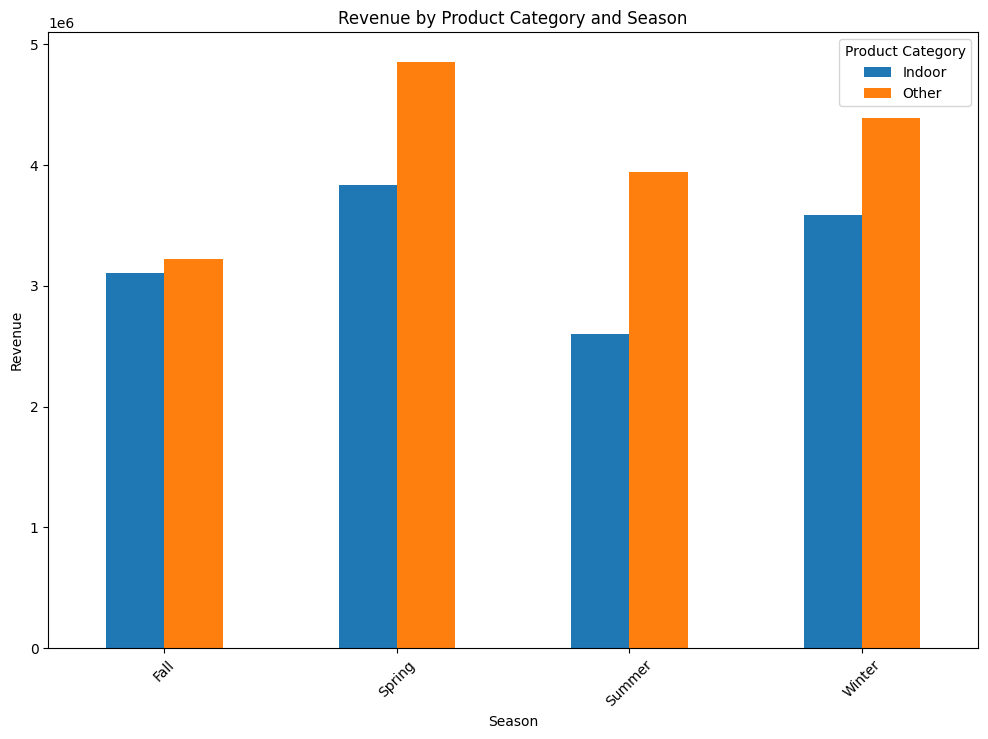

In [18]:
#indoor/outdoor variable
outdoor_product_lines = ['Gardening Tools', 'Outdoor Furniture', 'Camping Equipment']
indoor_product_lines = ['Office Supplies', 'Electronics', 'Kitchenware']

def categorize_product_line(product_line):
    if product_line in outdoor_product_lines:
        return 'Outdoor'
    elif product_line in indoor_product_lines:
        return 'Indoor'
    else:
        return 'Other'

data_valid_dates['Product_Category'] = data_valid_dates['product_line'].apply(categorize_product_line)

revenue_by_category_and_season = data_valid_dates.groupby(['Season', 'Product_Category'])['total_amount'].sum().reset_index()

pivot_table = revenue_by_category_and_season.pivot("Season", "Product_Category", "total_amount")

pivot_table.plot(kind='bar', figsize=(12, 8))
plt.title('Revenue by Product Category and Season')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()
